# Importing required packages

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore') # to ignore the warnings

# Reading the training data

In [72]:
df = pd.read_csv('day.csv')  # Replace with your dataset path
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [73]:
df.shape

(730, 16)

In [74]:
display(df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# (i) Renaming columns for better interpretation

In [77]:
df.rename(columns={'temp': 'temperature', 'hum': 'humidity', 'yr': 'year', 'season': 'season_type',
                   'weathersit': 'weather_condition', 'cnt': 'total_count', 'holiday': 'is_holiday', 'workingday': 'is_workingday',
                   'dteday' : 'datetime', 'mnth' : 'month'
                  }, 
          inplace=True)

# (ii) Typecasting the datetime and numerical attributes to category

In [80]:
df['year'] = df['year'].astype('category')
df['season_type'] = df['season_type'].astype('category')
df['weather_condition'] = df['weather_condition'].astype('category')
df['month'] = df.month.astype('category')
df['is_holiday'] = df['is_holiday'].astype('category')
df['is_workingday'] = df['is_workingday'].astype('category')
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y')

# Missing value analysis

In [81]:
df.isnull().sum()

instant              0
datetime             0
season_type          0
year                 0
month                0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temperature          0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

# Attributes distributions and trends
# (i). Monthly distribution of counts

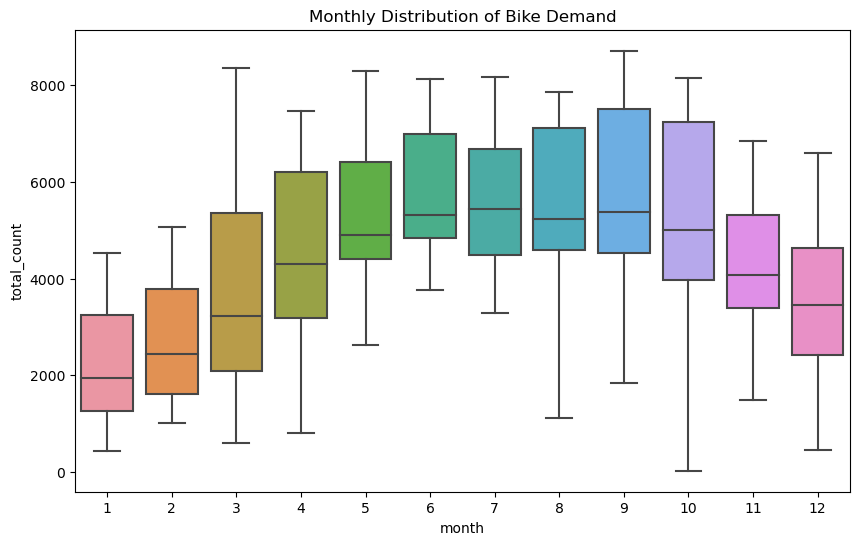

In [83]:
df['month'] = pd.to_datetime(df['datetime']).dt.month
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='month', y='total_count')
plt.title('Monthly Distribution of Bike Demand')

plt.show()

# (ii). Yearly wise distribution of counts

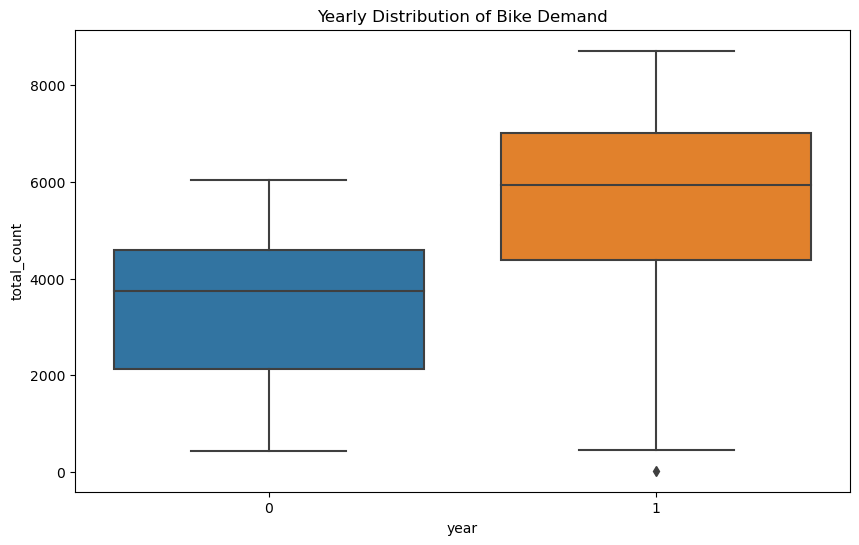

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='year', y='total_count')
plt.title('Yearly Distribution of Bike Demand')
plt.show()

#### We can see that the bike demand is higher in 2019 than 2018

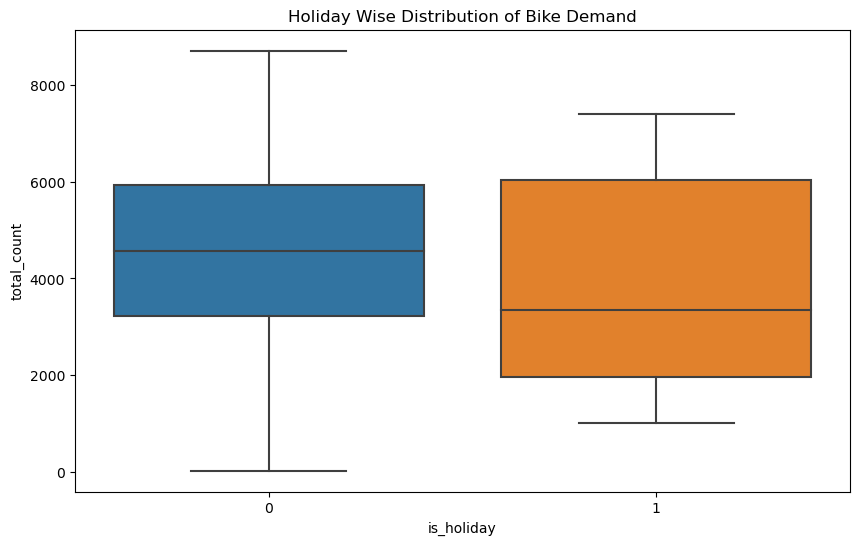

In [49]:
# (iii). Holiday wise distribution of counts

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='is_holiday', y='total_count')
plt.title('Holiday Wise Distribution of Bike Demand')
plt.show()

#### We can see that the bike demand is higher in no holiday than holiday

# (iv). Workingday-wise distribution of counts

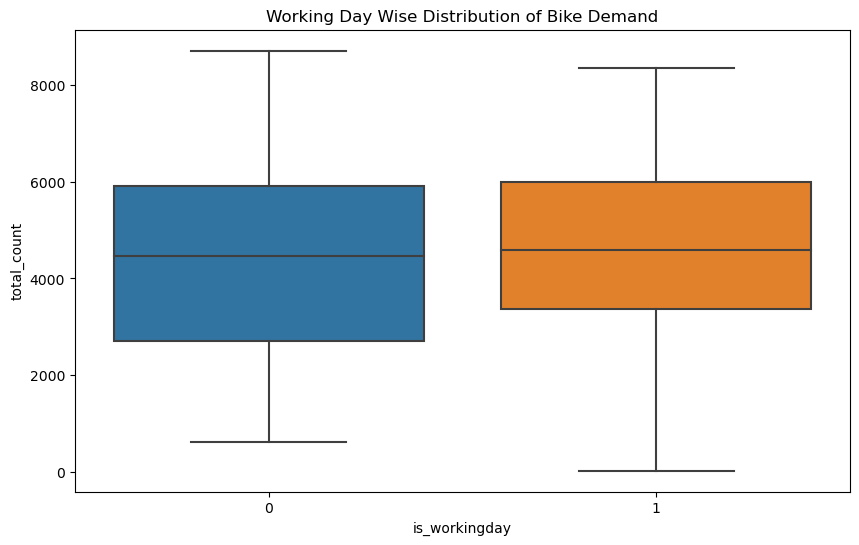

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='is_workingday', y='total_count')
plt.title('Working Day Wise Distribution of Bike Demand')
plt.show()

#### We can see that there is no significant change in bike demand on a working day vs non working day

# (v). Weather_condition_wise distribution of counts

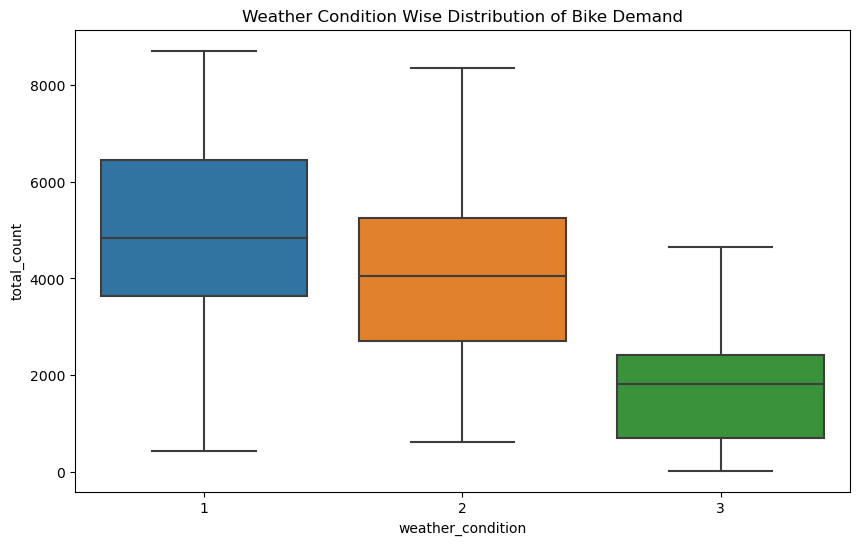

In [86]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='weather_condition', y='total_count')
plt.title('Weather Condition Wise Distribution of Bike Demand')
plt.show()

### We can see that bike demand is highest in partly cloudy weather and then misty followed by light snow and rain

# Outlier analysis
# (i) Total_count_outliers

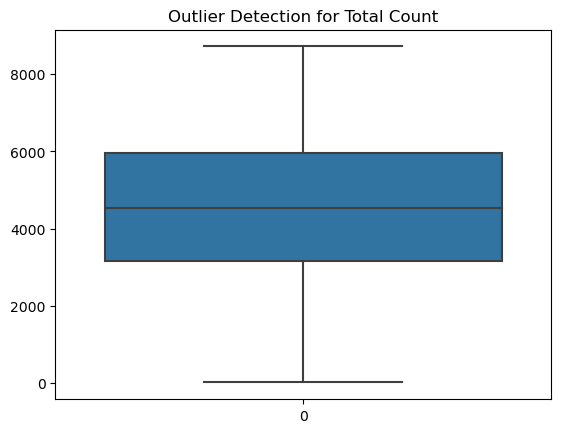

In [54]:
sns.boxplot(df['total_count'])
plt.title('Outlier Detection for Total Count')
plt.show()

### Good that there are no outliers present in total count variable

# (ii) Temp_windspeed_humidity_outliers

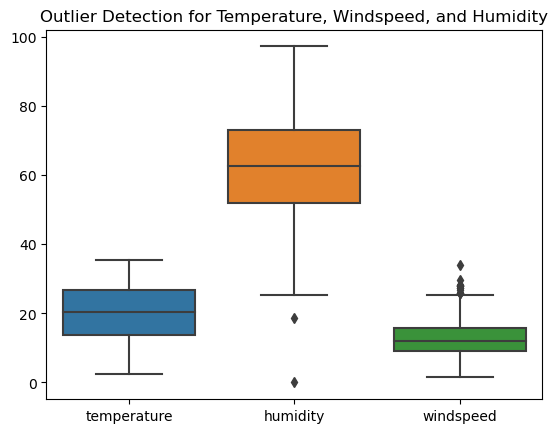

In [55]:
sns.boxplot(df[['temperature', 'humidity', 'windspeed']])
plt.title('Outlier Detection for Temperature, Windspeed, and Humidity')
plt.show()

# (iii) Replace and impute the outliers
# Detecting and replacing outliers for total_count

In [87]:
z_scores = np.abs(stats.zscore(df['total_count']))
df = df[(z_scores < 3)]  # Keep only data points within 3 standard deviations

# Replace outliers in temperature, humidity, and windspeed

In [88]:
df['temperature'] = np.where((df['temperature'] > df['temperature'].quantile(0.95)) | (df['temperature'] < df['temperature'].quantile(0.05)), df['temperature'].median(), df['temperature'])
df['humidity'] = np.where((df['humidity'] > df['humidity'].quantile(0.95)) | (df['humidity'] < df['humidity'].quantile(0.05)), df['humidity'].median(), df['humidity'])
df['windspeed'] = np.where((df['windspeed'] > df['windspeed'].quantile(0.95)) | (df['windspeed'] < df['windspeed'].quantile(0.05)), df['windspeed'].median(), df['windspeed'])

# (iv) Replace the original dataset to imputed data
# Now df is cleaned of outliers

In [89]:
df.head()

,instant,datetime,season_type,year,month,is_holiday,weekday,is_workingday,weather_condition,temperature,atemp,humidity,windspeed,casual,registered,total_count
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,20.465826,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,20.465826,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Normal Probability plot
# Checking the normality of 'total_count'

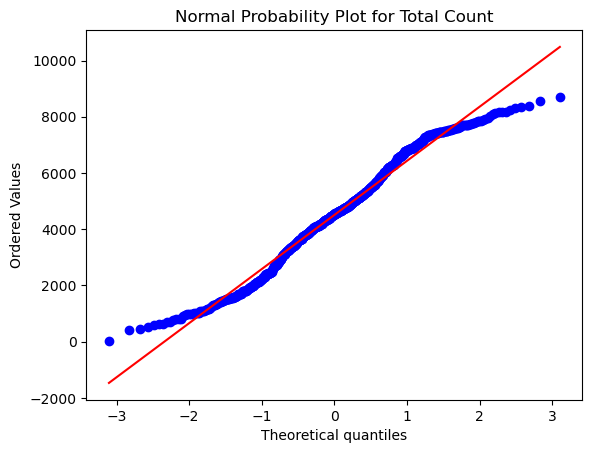

In [59]:
stats.probplot(df['total_count'], dist="norm", plot=plt)
plt.title('Normal Probability Plot for Total Count')
plt.show()

# Correlation matrix

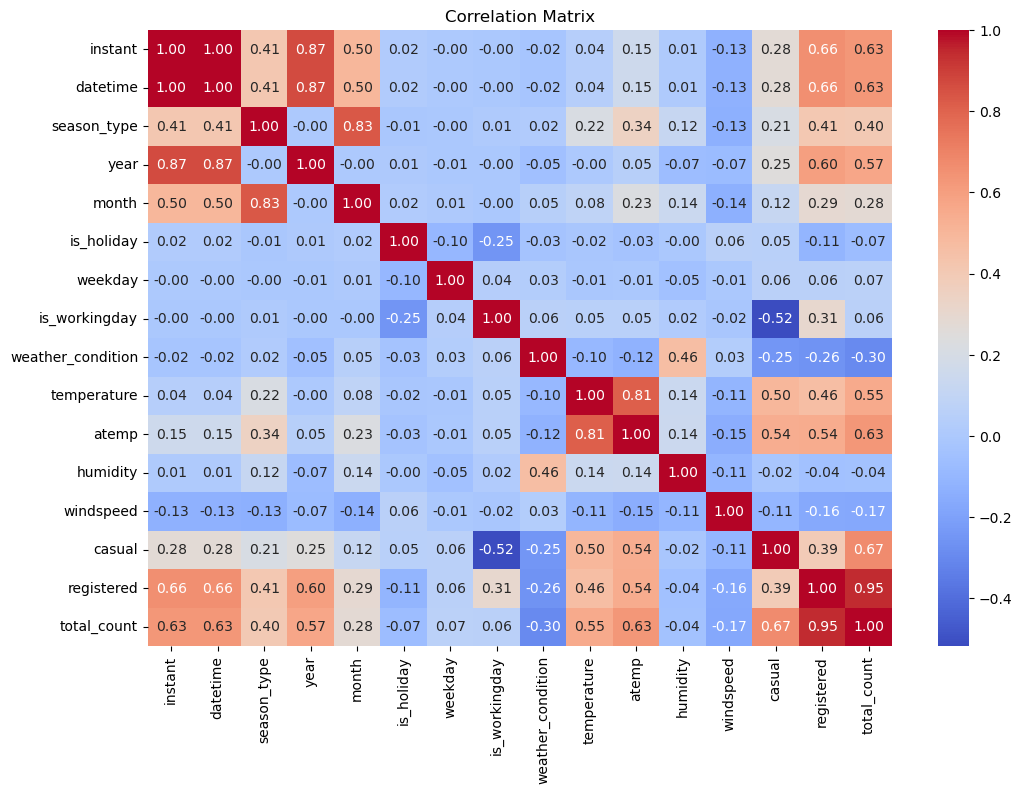

In [91]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Modelling the dataset
# (i) Split the dataset into train and test in the ratio of 70:30

In [135]:
X = df.drop(['total_count', 'datetime', 'instant'], axis=1)  # Exclude the target variable and date
y = df['total_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [136]:
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
display(y_train.head())
display(y_test.head())

(511, 13)

(219, 13)

(511,)

(219,)

683    5445
645    5478
163    5020
360    1162
640    7572
Name: total_count, dtype: int64

468    7460
148    4788
302    3331
355    3068
515    7338
Name: total_count, dtype: int64

# (ii) Split the features into categorical and numerical features
# Numerical features

In [137]:
num_features = X.select_dtypes(include=['float64']).columns

# Categorical features

In [138]:
cat_features = X.select_dtypes(include=['category']).columns

In [139]:
train_encoded_attributes=pd.get_dummies(X,columns=cat_features)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (730, 21)


,month,weekday,temperature,atemp,humidity,windspeed,casual,registered,season_type_1,season_type_2,...,season_type_4,year_0,year_1,is_holiday_0,is_holiday_1,is_workingday_0,is_workingday_1,weather_condition_1,weather_condition_2,weather_condition_3
0,1,6,14.110847,18.18125,80.5833,10.749882,331,654,True,False,...,False,True,False,True,False,True,False,False,True,False
1,1,0,14.902598,17.68695,69.6087,16.652113,131,670,True,False,...,False,True,False,True,False,True,False,False,True,False
2,1,1,20.465826,9.47025,43.7273,16.636703,120,1229,True,False,...,False,True,False,True,False,False,True,True,False,False
3,1,2,20.465826,10.60610,59.0435,10.739832,108,1454,True,False,...,False,True,False,True,False,False,True,True,False,False
4,1,3,9.305237,11.46350,43.6957,12.522300,82,1518,True,False,...,False,True,False,True,False,False,True,True,False,False


# (iii) Decoding the training attributes

In [140]:
X_train_cat = pd.get_dummies(X_train[cat_features], drop_first=True)
X_train_num = X_train[num_features]

# Concatenate to form the final training set


In [141]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)

# Linear Regression model

In [142]:
model = LinearRegression()

# Training model
# (i) Fit the training model

In [152]:
model.fit(X_train, y_train)

LinearRegression()

# (ii) Accuracy of model

In [144]:
train_accuracy = model.score(X_train_final, y_train)
print(f"Training R-squared: {train_accuracy:.4f}")

Training R-squared: 0.8270


# (iii) Model evaluation metrics:- R-squared and mean squared error score

In [145]:
y_pred_train = model.predict(X_train_final)
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

In [146]:
print(f"Training MSE: {train_mse:.4f}")
print(f"Training R-squared: {train_r2:.4f}")

Training MSE: 648956.7309
Training R-squared: 0.8270


In [170]:
n = X_train.shape[0]

# Calculate the number of features (predictors, p) along axis 1
p = X_train.shape[1]

# Calculate the Adjusted R-squared using the formula
train_adjusted_r2 = 1 - (1 - train_r2) * (n - 1) / (n - p - 1)

# Display the calculated Adjusted R-squared for the test set
print(f"Training Adjusted R-squared: {round(train_adjusted_r2, 3)}")

Training Adjusted R-squared: 0.822


# Testing model
# (i) Decoding the test attributes

In [153]:
X_test_cat = pd.get_dummies(X_test[cat_features], drop_first=True)
X_test_num = X_test[num_features]
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

# (ii) Model performance on test dataset (Predict the model)

In [154]:
y_pred_test = model.predict(X_test_final)

# (iii) Model evaluation metrics:- Root mean square error and mean absolute error scores

In [163]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R-squared: {test_r2:.4f}")

Test RMSE: 802.0207
Test R-squared: 0.8266


In [169]:
n = X_test.shape[0]

# Calculate the number of features (predictors, p) along axis 1
p = X_test.shape[1]

# Calculate the Adjusted R-squared using the formula
test_adjusted_r2 = 1 - (1 - test_r2) * (n - 1) / (n - p - 1)

# Display the calculated Adjusted R-squared for the test set
print(f"Testing adjusted R-squared: {round(test_adjusted_r2, 3)}")

Testing adjusted R-squared: 0.816


# (iv) Residual plot

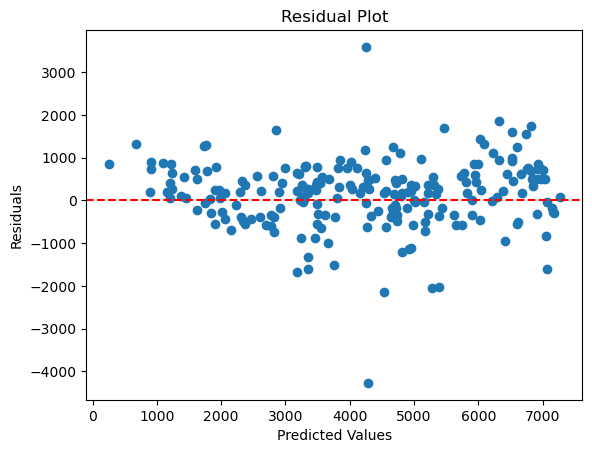

In [161]:
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# (v) Homoscedasticity

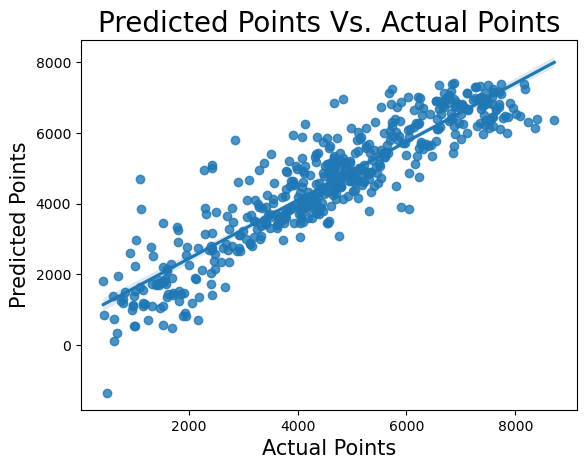

In [158]:
sns.regplot(x=y_train, y=y_pred_train)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

# Conclusion

**Train Dataset**
- **Train r square value: 0.827**
- **Train Adjusted r square value: 0.822**

**Test Dataset**
- **Test r square value: 0.8266**
- **Test Adjusted r square value: 0.816**

1. The model performs well on the training and test data, explaining **82% of the variance**.
2. The adjusted value of **81.6% for the test set suggests that the model's performance is consistent**.
3. Overall, the **model is considered good** as it effectively captures the variance in both training and test data.